# Data Bootcamp Final Project - Fall 2017

Amy Elgin 

ate228@stern.nyu.edu

# Student-Athlete Academic Performance

## Project Overview

This project was inspired by my own involvement in NCAA sports and time as a student-athlete. The NCAA has created a set of eligibility rules to ensure that student-athletes perform both on the playing field and in the classroom. These eligibility rules require students to pass a minimum of 12 credits each semester. Furthermore, a student-athlete must maintain a GPA of above 2.0 at all times. 

Schools invest a significant amount of money into their student-athletes, but also get significant monetary returns from their athletics programs through ticket sales and donors. However, many of these students will not play professional sports and will rely on their education to secure a job in the future. As a result, it is important to balance and monitor both a student-athlete's academic and athletic performance. 

### Data Source

This dataset was created by the NCAA through surveys of athletics programs. I accessed the dataset through [Kaggle](https://www.kaggle.com/ncaa/academic-scores).

In 2003, the NCAA implemented an academic reform plan designed to improve the academic success and graduation of all student-athletes. The plan included the development of a real-time academic measurement for sports teams, known as the Academic Progress Rate (APR). For high APR scores, the NCAA recognizes member institutions for ensuring that student-athletes succeed in the classroom. If, however, low APR scores are earned consistently, member institutions can be subjected to penalties including scholarship reductions and the loss of eligibility to compete in championships.

This dataset specifically looks at Division I institutions and their Academic Progress Rate scores and retention rates by sport and school. I will be focusing primarily on 2014 as it is the most recent year available. 

### The Questions 

* **Do women outperform men in the classroom?** There have been siginificant improvements to create equal opportunities for women in college sports through Title IX. I would like to compare the academic performance of male and female athletes to determine if money should potentially be reallocated based on differences in academic performance based on gender.

* **Does your sport influence your academic success?** Different sports require different physical and time management demands. For example, a basketball team may have multiple games during the week, where as Football only plays on Saturdays. As a result, I would like to explore which sports have the lowest APR scores. 

* **Does it pay to play?** Among universities there are large discrepencies in the cost to fund athletics programs. Often better funded athletics programs can afford additional perks like tutors and separate study areas to help student-athletes perform better. I would like to examine APR rates by university to determine if there is a significant difference. 

### The Packages

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image

### The Data

In [3]:
path = '/Users/Amy/Documents/NCAA_database.csv'

NCAA = pd.read_csv(path)
NCAA.head(5)

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2006_ELIGIBILITY,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION
0,100654,Alabama A&M University,0,2014,1,Baseball,1,2,Southwestern Athletic Conference,80,...,0.8974,0.9487,21,917,0.8810,0.9524,20,975,0.9750,0.9750
1,100654,Alabama A&M University,0,2014,4,Football,1,2,Southwestern Athletic Conference,321,...,0.9111,0.9630,74,921,0.8759,0.9655,74,871,0.8601,0.8811
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,2,Southwestern Athletic Conference,43,...,0.9615,0.8462,11,909,0.9091,0.9091,10,950,0.9500,0.9500
3,100654,Alabama A&M University,0,2014,6,Men's Golf,1,2,Southwestern Athletic Conference,22,...,0.8889,0.8889,7,929,0.8571,1.0000,-99,-99,-99.0000,-99.0000
4,100654,Alabama A&M University,0,2014,13,Men's Tennis,1,2,Southwestern Athletic Conference,12,...,0.8889,0.8889,4,1000,1.0000,1.0000,6,958,1.0000,0.9167


### Summary Statistics

This data includes D1 athletics programs. We can sort the data based on University, sport, and conference. Furthermore, each school has an ID and each sport has a unique code. 

In [3]:
NCAA.shape

(6511, 57)

In [4]:
NCAA.dtypes.head(15)

SCHOOL_ID                 int64
SCHOOL_NAME              object
SCHOOL_TYPE               int64
ACADEMIC_YEAR             int64
SPORT_CODE                int64
SPORT_NAME               object
NCAA_DIVISION             int64
NCAA_SUBDIVISION          int64
NCAA_CONFERENCE          object
FOURYEAR_ATHLETES         int64
FOURYEAR_SCORE            int64
FOURYEAR_ELIGIBILITY    float64
FOURYEAR_RETENTION      float64
2014_ATHLETES             int64
2014_SCORE                int64
dtype: object

## Male vs. Female Athletes 

The first step is to identify which teams are men's teams and which are women's teams. I created an additional column labeled gender which identifes what category the team belongs to. 

In [40]:
female_ind = [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38] 
#These are the sport codes that correspond to women's sports teams
NCAA['gender'] = ['Female' if val in female_ind else 'Male' for val in NCAA["SPORT_CODE"]]
#This makes a new column assigning a team as male or female
NCAA.head(3)

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,gender
0,100654,Alabama A&M University,0,2014,1,Baseball,1,2,Southwestern Athletic Conference,80,...,0.9487,21,917,0.8810,0.9524,20,975,0.9750,0.9750,Male
1,100654,Alabama A&M University,0,2014,4,Football,1,2,Southwestern Athletic Conference,321,...,0.9630,74,921,0.8759,0.9655,74,871,0.8601,0.8811,Male
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,2,Southwestern Athletic Conference,43,...,0.8462,11,909,0.9091,0.9091,10,950,0.9500,0.9500,Male


Next, I will be able to pull the male teams and female teams to compare their eligibility scores in plots. Here is how I would access either men's or women's teams. 

In [41]:
NCAA[NCAA['gender']=='Male'].head(3)

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,gender
0,100654,Alabama A&M University,0,2014,1,Baseball,1,2,Southwestern Athletic Conference,80,...,0.9487,21,917,0.8810,0.9524,20,975,0.9750,0.9750,Male
1,100654,Alabama A&M University,0,2014,4,Football,1,2,Southwestern Athletic Conference,321,...,0.9630,74,921,0.8759,0.9655,74,871,0.8601,0.8811,Male
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,2,Southwestern Athletic Conference,43,...,0.8462,11,909,0.9091,0.9091,10,950,0.9500,0.9500,Male


In [42]:
NCAA[NCAA['gender']=='Female'].head(3)

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,gender
7,100654,Alabama A&M University,0,2014,19,Women's Basketball,1,2,Southwestern Athletic Conference,53,...,1.0,14,1000,1.0,1.0,13,960,1.0000,0.92,Female
8,100654,Alabama A&M University,0,2014,20,Women's Bowling,1,2,Southwestern Athletic Conference,24,...,1.0,6,1000,1.0,1.0,11,1000,1.0000,1.00,Female
9,100654,Alabama A&M University,0,2014,21,Women's Cross Country,1,2,Southwestern Athletic Conference,33,...,1.0,17,1000,1.0,1.0,14,929,0.8571,1.00,Female


Next, I will plot the data based on gender. I will use a bar chart to analyze the average academic performance rate for women's sports versus men's sports.

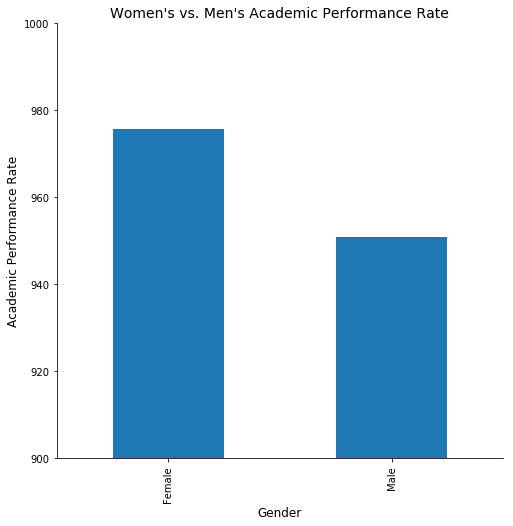

In [28]:
gender = NCAA.groupby('gender')

gender_avg = gender['2014_SCORE'].mean()

fig, ax = plt.subplots(figsize=(8,8))

ax.set_ylim(900,1000)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

gender_avg.plot(kind='bar')

ax.set_title("Women's vs. Men's Academic Performance Rate", fontsize = 14)
ax.set_ylabel('Academic Performance Rate', fontsize = 12)
ax.set_xlabel('Gender', fontsize = 12)

plt.show()

The data shows that in 2014, female athletes did outperform male athletes in the classroom. The average academic progress rate for female athletes was 975.72. The average academic progress rate for male athletes was 950.93. Thus, females outperformed males by about 25 points.

## Sport Comparisons 

Next, we can analyze our data by sport to determine if there is a difference in academic performance between teams. 

In [5]:
avg = NCAA['2014_SCORE'].mean()
print(avg)

964.5138995545999


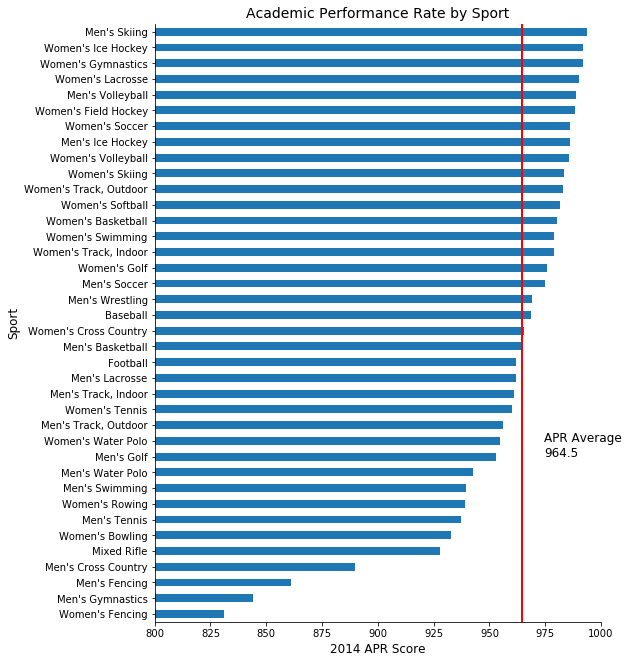

In [23]:
sports = NCAA.groupby("SPORT_NAME")

sport_avg = sports["2014_SCORE"].mean().sort_values(ascending = True)

fig, ax = plt.subplots(figsize=(8,11))

ax.set_xlim(800,1000)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.axvline(x=avg, color='r', label='Average APR', linestyle='-', linewidth=2)     

message = "APR Average \n" + str(round(avg, 1))
ax.text(avg +10, 10, message, horizontalalignment='left', fontsize=12)

sport_avg.plot(kind='barh')

ax.set_title('Academic Performance Rate by Sport', fontsize = 14)
ax.set_ylabel('Sport', fontsize = 12)
ax.set_xlabel('2014 APR Score', fontsize = 12)

plt.show()

From the data we see that men's skiing and women's ice hockey are the sports with the highest academic porgress rates in 2014. However, not all schools have these sports. Of the most popular sports, Women's Lacrosse and Men's Volleyball have the highest APR, followed by Women's Field Hockey, Women's Soccer, and Women's Volleyball. 

The average academic performance rate for NCAA athletes in 2014 was 964.5. There are 17 out of the 38 sports who fall below this line. Of these includes Football, which is one the most funded sports programs and often a large revenue generator among many universities. 

Again, at the bottom of the list are a few sports that not all colleges have teams for. Men's Cross Country seems to be the first widely funded sport with the lowest APR score. This could be a result of the fact that Cross Country is an inexpensive sport to fund and many students can participate. 

This data also supports our earlier finding that women's teams tend to outperform men's teams as 7 out of the top 10 scores belong to women's teams. 

## University Comparisons 

In [5]:
university = NCAA.groupby("SCHOOL_NAME")
avg_elg = university[["2014_SCORE"]].mean()
avg_elg.head(10)

,2014_SCORE
SCHOOL_NAME,
Abilene Christian University,946.375000
Alabama A&M University,824.437500
Alabama State University,957.055556
Alcorn State University,890.705882
American International College,1000.000000
American University,992.250000
Appalachian State University,974.700000
Arizona State University,988.000000
Arkansas State University,968.312500


Because of the large amount of universities, I have decided to choose a smaller subset of schools to better visualize the data.

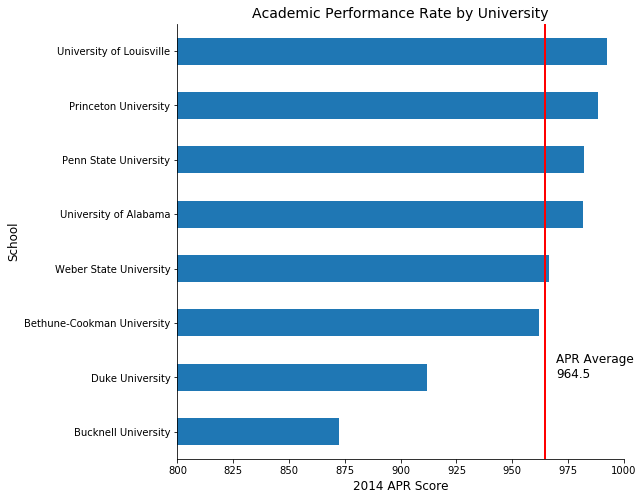

In [12]:

university_list = ['186131', '211291', '214777', '140164', '157289', '198419', '132602', '230782'] 
#Princeton, Bucknell, Penn State, Alabama University, University of Louisville, 
#Duke, Bethune-Cookman University, Weber State University

labels = {'186131': 'Princeton University', '211291': 'Bucknell University',
          '214777': 'Penn State University', '140164': 'University of Alabama', 
          '157289': 'University of Louisville', '198419': 'Duke', 
          '132602': 'Bethune-Cookman University' , '230782': 'Weber State University'}
                

subuniversity = NCAA[NCAA.SCHOOL_ID.isin(university_list)]

grouped = subuniversity.groupby("SCHOOL_ID")

avg_eligibility = grouped['2014_SCORE'].mean().sort_values(ascending = True)

avg = NCAA['2014_SCORE'].mean()

fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(800,1000)

ax.set_title('Academic Performance Rate by University', fontsize = 14)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.axvline(x=avg, color='r', label='Average APR', linestyle='-', linewidth=2)     

message = "APR Average \n" + str(round(avg, 1))
ax.text(avg + 5, 1, message, horizontalalignment='left', fontsize=12)


avg_eligibility.plot(kind = 'barh')

ax.set_ylabel('School', fontsize = 12)
ax.set_xlabel('2014 APR Score', fontsize = 12)

ax.set_yticklabels(['Bucknell University', 'Duke University', 'Bethune-Cookman University', 'Weber State University',
                   'University of Alabama', 'Penn State University', 'Princeton University', 'University of Louisville'])

plt.show()

From this limited selection of schools, we can interpret a few trends. At the top of the academic performance are University of Louisville and Prinecton University, followed by Penn State University and University of Alabama. These are all large schools that receive lots of funding and perform very well on the field as well. From personal connections to athletes at these schools, they do recieve additional help in managing the obligations of a student athlete. 

In contrast, the two lowest performing schools include Bucknell University and Duke University. While these schools' have high tuition, they are both private schools. Furthermore, they also posess rigorous academic standards and can be very hard to get in to when applying for colleges. Often athletes have their applications flagged and are admitted to schools as long as they can meet minimum eligibility. Another possible explanation is that not all teams or athletes at these schools receive the same benefits.

Finally, as predicted, lesser known schools with smaller athletics programs do tend to fall closer to the bottom in terms of academic performance. Bethune-Cookman University and Weber State University fall right at the average of academic performance for the NCAA as a whole.

**The next step is to see if there is a relationship between this academic performance and student's post graduate earnings.**

I used the College Scorecard data from the US department of education. This data provides a wide array of information on the college graduates of America's universities. I will focus on earnings from college graduates of the 10 universities selected above. 

In [109]:
path_1 = 'https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Treasury-Elements.csv' 

#Earnings = pd.read_csv(path_1)

School =  ['The University of Alabama', 'Princeton University', 'Duke University', 'University of Louisville',
          'Bucknell University', 'Pennsylvania State University-Main Campus', 
          'Bethune-Cookman University', 'Weber State University']

Earnings = pd.read_csv(path_1)

Uni_Earnings = Earnings[Earnings.INSTNM.isin(School)]

Uni_Earnings.head(5)


,UNITID,OPEID,OPEID6,INSTNM,COUNT_ED,AGEGE24,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,...,PCT25_EARN_WNE_P8,PCT75_EARN_WNE_P8,PCT90_EARN_WNE_P8,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9
5,100751,105100,1051,The University of Alabama,NaN,0.10000000149011,75.3499984741211,21.0599994659423,1.20000004768371,2.41000008583068,...,25100,53900,77400,39200,0.753,321,3536,47200,49300,0.77460408210754
681,132602,146700,1467,Bethune-Cookman University,NaN,0.05000000074505,51.4599990844726,39.9900016784668,1.94000005722045,12.3900003433227,...,15100,37100,48400,18900,0.522,146,1072,32000,39300,0.56529849767684
1378,157289,199900,1999,University of Louisville,NaN,0.20999999344348,84.6500015258789,11.7100000381469,1.23000001907348,2.02999997138977,...,23700,51500,68900,39500,0.73,317,2746,42600,48500,0.71704298257827
2217,186131,262700,2627,Princeton University,NaN,0.07999999821186,72.9499969482422,13.2799997329711,6.11999988555908,11,...,30700,100800,212100,116400,0.803,36,287,98600,115600,0.85365855693817
2609,198419,292000,2920,Duke University,NaN,0.20999999344348,76.370002746582,13.579999923706,4.51999998092651,8.61999988555908,...,49300,127100,190700,96100,0.903,96,1083,101100,99400,0.89473682641983


Now that I have the data on the 8 Universities from my original analysis, I will need to merge the two dataframes. 

In [112]:
merged = subuniversity.merge(Uni_Earnings, left_on = 'SCHOOL_NAME', right_on = 'INSTNM', how = 'outer')
merged.head(5)

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,PCT25_EARN_WNE_P8,PCT75_EARN_WNE_P8,PCT90_EARN_WNE_P8,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9
0,132602.0,Bethune-Cookman University,1.0,2014.0,1.0,Baseball,1.0,2.0,Mid-Eastern Athletic Conference,102.0,...,15100,37100,48400,18900,0.522,146,1072,32000,39300,0.56529849767684
1,132602.0,Bethune-Cookman University,1.0,2014.0,4.0,Football,1.0,2.0,Mid-Eastern Athletic Conference,315.0,...,15100,37100,48400,18900,0.522,146,1072,32000,39300,0.56529849767684
2,132602.0,Bethune-Cookman University,1.0,2014.0,2.0,Men's Basketball,1.0,2.0,Mid-Eastern Athletic Conference,49.0,...,15100,37100,48400,18900,0.522,146,1072,32000,39300,0.56529849767684
3,132602.0,Bethune-Cookman University,1.0,2014.0,3.0,Men's Cross Country,1.0,2.0,Mid-Eastern Athletic Conference,32.0,...,15100,37100,48400,18900,0.522,146,1072,32000,39300,0.56529849767684
4,132602.0,Bethune-Cookman University,1.0,2014.0,6.0,Men's Golf,1.0,2.0,Mid-Eastern Athletic Conference,28.0,...,15100,37100,48400,18900,0.522,146,1072,32000,39300,0.56529849767684


Now that the data is merged, we can use a scatter plot to compare each university's average Academic Progress Rate with their graduates' average earnings. While this is not an exact comparison because the earnings includes all students and not just athletes, it is a good approximate based on the data available. 

In [130]:
uni_grouped = merged.groupby('SCHOOL_NAME')['2014_SCORE'].mean()

uni_grouped

uni_grouped.sort_values(ascending = True).head(8)

SCHOOL_NAME
Bucknell University              872.555556
Duke University                  911.961538
Bethune-Cookman University       962.058824
Weber State University           966.250000
Kennesaw State University        981.588235
Pennsylvania State University    982.354839
Princeton University             988.312500
University of Louisville         992.260870
Name: 2014_SCORE, dtype: float64

In [131]:
type(merged['MN_EARN_WNE_P10'])

earnings_grouped = merged.groupby('INSTNM')['MN_EARN_WNE_P10'].max()

earnings_grouped.sort_values(ascending = True).head(8)


INSTNM
Duke University                              108900
Princeton University                         113900
Bethune-Cookman University                    31700
University of Louisville                      45200
Weber State University                        48700
The University of Alabama                     49900
Pennsylvania State University-Main Campus     55300
Bucknell University                           76300
Name: MN_EARN_WNE_P10, dtype: object

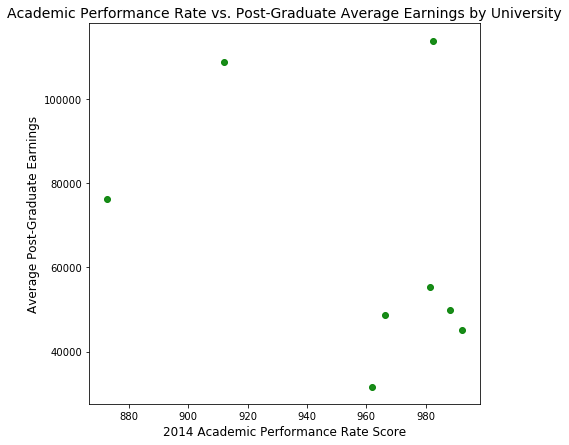

In [140]:
fig, ax = plt.subplots(figsize = (7,7))

ax.scatter(uni_grouped, earnings_grouped, alpha = 0.9, color = 'g')

ax.set_title('Academic Performance Rate vs. Post-Graduate Average Earnings by University', fontsize = 14)
ax.set_xlabel('2014 Academic Performance Rate Score', fontsize = 12)
ax.set_ylabel('Average Post-Graduate Earnings', fontsize=12)

plt.show()

The scatterplot of these 8 universities shows that there is essentially no correlation between academic performance rate and graduate earnings. Again, this is likely because the graduate earnings represent all students of the university where as academic performance rate is only availabe for athletes which is a small subset of the overall student population. 

Universities such as Duke, who has a below average academic performance rate among athletes has one of the highest average earnings for graduates at over 100K. Conversely, the University of Louisville has the highest APR, but the second lowest average earnings among graduates. Furthermore, Bucknell University has the lowest APR score, but above average post-graduate average earnings. 

To reiterate, there is no correlation between academic performance rate and post-graduate earnings. However, this conclusion is taken from an extremely small subset of the universities in America. If replicated on a larger scale, the data may provide a different conclusion. 

## Project Conclusions

Through my analysis of the NCAA Divison 1 academic performance data for 2014, I was able to answer the three previously identified questions.

* **Do women outperform men in the classroom?** The data showed that female athletes outperform male athletes by an average of 25 points on the academic progress rate scale. 

* **Does your sport influence your academic success?** The data provided evidence that your sport can in fact influence your academic progress rate. 17 of the 38 sports fall below the average academic progress rate for the NCAA as a whole. 

* **Does it pay to play?** Given the extensive data, I was only able to analyze a select set of schools. While it was difficult to determine any exact conclusion, there are some strong trends in the selected data. Schools with heavily funded athletics programs perform above average in terms of academic progress. In contrast, smaller schools with limited focus on athletics tend to fall at the average of academic progress performance. However, a more in-depth analysis showed that there is essentially no correlation between academic performance rate among student-athletes and the average post-graduate earnings for the university. 

Ultimately, the data provides a compelling picture that there is dispersion in academic performance among student-athletes in the NCAA that can be explained by numerous factors. While all student-athletes, teams, and universities should receive equal treatment, this is not always the case. As a result, instituting more stringent academic standards and enforcing them more, can ensure that Universities are investing the proper resources into the success of their athletes both on the field and in the classroom. 